# Insights from Stack Overflow Developer Survey 2023

**Summary:**

> In this notebook, we will delve into the Stack Overflow Developer Survey 2023 data to uncover valuable insights about the developer community. We will explore **demographics**, **popular technologies**, **career trends**, and **work preferences** among developers. Our analysis will leverage Python's powerful data manipulation and visualization libraries, including pandas, numpy, matplotlib, and seaborn.

**Scope:**

This analysis aims to provide a comprehensive overview of key trends and patterns within the developer community. We will:

 * Examine the demographic profiles of survey respondents.
 * Identify the most popular programming languages and tools.
 * Analyze salary distributions and factors influencing compensation.
 * Explore work preferences and professional development trends.

**Note :** This notebook is designed to be extendable, allowing for the addition of further insights and analyses as needed. Future additions might include deeper dives into specific subgroups, sentiment analysis of open-ended responses, and predictive modeling of career outcomes.

**Data Sources:**

* [Stack Overflow Developer Survey 2023 Results](https://survey.stackoverflow.co/): The primary dataset for this analysis, which includes responses from developers worldwide.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

sns.set_style('dark')

## 1. Loading data

Load the survey results (responses) and schema (questions) as separate and explore different columns of both.

In [2]:
survey_schema_raw = pd.read_csv('dataset/survey_results_schema.csv')
survey_responses_raw = pd.read_csv('dataset/survey_results_public.csv')

In [3]:
survey_schema_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         78 non-null     object
 1   qname       78 non-null     object
 2   question    78 non-null     object
 3   force_resp  67 non-null     object
 4   type        78 non-null     object
 5   selector    78 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [4]:
survey_schema_raw.head(30)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [5]:
survey_schema_raw.loc[2].question

'<div><span style="font-size:19px;"><strong>You consent to providing your information to help us stay privacy compliant</strong></span></div>\n\n<div> </div>\n\n<div>Your participation in this survey is completely anonymous.  As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file.  The information gathered via this survey is made available to the public in the spirit of community which Stack Overflow was founded and to serve as a resource for everyone who codes. </div><div><br></div><div>By selecting "I agree" and submitting this survey, you acknowledge that you voluntarily consent to your anonymous answers being made publicly available.\n</div>'

In [6]:
survey_responses_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
survey_responses_raw.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [8]:
# Extracting question(s) text from raw schema
survey_questions = pd.read_csv('dataset/survey_results_schema.csv', index_col='qname').question

In [9]:
survey_questions.head(10)

qname
S0                  <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                            Browser Meta Info
Q310                <div><span style="font-size:19px;"><strong>You...
Q120                                                                 
S1                  <span style="font-size:22px; font-family: aria...
MainBranch          Which of the following options best describes ...
Age                                               What is your age? *
Employment          Which of the following best describes your cur...
RemoteWork          Which best describes your current work situation?
CodingActivities    Which of the following best describes the code...
Name: question, dtype: object

In [10]:
survey_questions['CodingActivities']

'Which of the following best describes the code you write outside of work? Select all that apply.'

In [11]:
survey_responses_raw['CodingActivities'].head()

0                                                  NaN
1    Hobby;Contribute to open-source projects;Boots...
2    Hobby;Professional development or self-paced l...
3                                                Hobby
4    Hobby;Contribute to open-source projects;Profe...
Name: CodingActivities, dtype: object

In [12]:
# Let's analyze our respondent's coding activities

# Step 1: Break down the `CodingActivities` column into multiple columns (by creating a new dataframe).

# Step 2: Visualize different columns using a Pie-chart.

In [13]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [14]:
id(survey_responses_raw['CodingActivities'])

5812101408

In [15]:
split_multicolumn(survey_responses_raw['CodingActivities'])

,Hobby,Contribute to open-source projects,Bootstrapping a business,Professional development or self-paced learning from online courses,I don’t code outside of work,Freelance/contract work,School or academic work,Other (please specify):
0,False,False,False,False,False,False,False,False
1,True,True,True,True,False,False,False,False
2,True,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
89179,True,False,True,False,False,True,False,False
89180,False,False,False,False,False,False,True,False
89181,False,False,False,False,False,False,False,False
89182,True,False,False,False,False,False,True,False


<Axes: title={'center': 'Which of the following best describes the code you write outside of work? Select all that apply.'}>

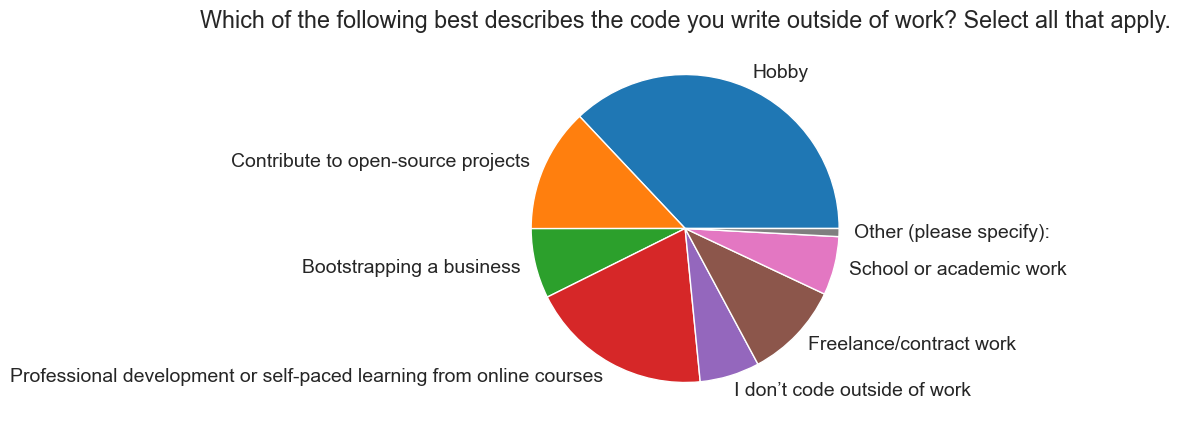

In [16]:
split_multicolumn(survey_responses_raw['CodingActivities']).sum().plot(kind='pie', title=survey_questions['CodingActivities'])

---

In [17]:
# Let's analyze our respondent's current work situation (remote vs hybrid vs in-person)

# Step 1: Count different types of `RemoteWork` entries using `value_counts()` method on a Series excluding NaN values

# Step 2: Visualize different entries using a Pie-chart.

In [18]:
survey_questions['RemoteWork']

'Which best describes your current work situation?'

In [19]:
survey_responses_raw['RemoteWork'].head(10)

0                                     NaN
1                                  Remote
2    Hybrid (some remote, some in-person)
3    Hybrid (some remote, some in-person)
4                                  Remote
5                                  Remote
6                                  Remote
7                                  Remote
8    Hybrid (some remote, some in-person)
9                                     NaN
Name: RemoteWork, dtype: object

<Axes: title={'center': 'Which best describes your current work situation?'}, ylabel='count'>

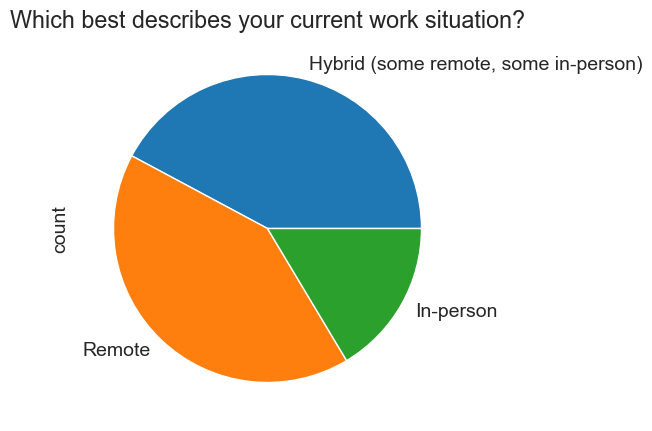

In [20]:
survey_responses_raw['RemoteWork'].value_counts(dropna=True).plot(kind='pie', title=survey_questions['RemoteWork'])

## Data Cleaning and Preprocessing

(Convert data types, handle missing values and standardize categorical data)

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

 * Demographics of the survey respondents and the global programming community
 * Distribution of programming skills, experience, and preferences
 * Employment-related information, preferences, and compensation
 * AI-related data points include interests in AI tools, current utilization rates, and expectations for future tools in terms of similarity to existing ones.

Let's select a subset of columns with the relevant data for our analysis.

In [21]:
survey_responses_raw.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [22]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'EdLevel',
    'MainBranch',
    
    # Programming experience
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    
    # Employment
    'Employment',
    'DevType',
    'WorkExp',
    # 'CompTotal',
    
    # AI
    'AISearchHaveWorkedWith',
    'AISearchWantToWorkWith',
    'AISelect', 
    'AISent', 
    'AIAcc', 
    'AIBen',
    'AIToolInterested in Using', 
    'AIToolCurrently Using',
    'AIToolNot interested in Using', 
    'AINextVery different',
    'AINextNeither different nor similar', 
    'AINextSomewhat similar',
    'AINextVery similar', 
    'AINextSomewhat different'
]

len(selected_columns)

27

Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [23]:
survey_df = survey_responses_raw[selected_columns].copy()

In [24]:
survey_df.sample(10)

,Country,Age,EdLevel,MainBranch,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different
33859,Turkey,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Formal documentation provided by the owner of ...,NaN,13,5,C;Python,C;C++;Python;Rust;Solidity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79864,Germany,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","I am not primarily a developer, but I write co...",NaN,Other,10,8,Dart;HTML/CSS;JavaScript;Python,Dart;HTML/CSS;JavaScript;Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35662,Philippines,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","I am not primarily a developer, but I write co...",Blogs with tips and tricks;Written Tutorials;C...,NaN,24,18,HTML/CSS;JavaScript;PHP;Ruby;SQL;Visual Basic ...,HTML/CSS;JavaScript;PHP;Ruby;SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,France,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I am a developer by profession,Formal documentation provided by the owner of ...,Other,8,3,C#;Dart;HTML/CSS;JavaScript;PHP;R;SQL;TypeScript,NaN,...,Increase productivity;Improve accuracy in coding,Neither trust nor distrust,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32390,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Recorded coding sessions;Online challenges (e....,NaN,8,4,Bash/Shell (all shells);C#;HTML/CSS;PowerShell...,Dart;F#;JavaScript,...,Increase productivity;Greater efficiency;Impro...,Neither trust nor distrust,Documenting code;Debugging and getting help;Te...,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,NaN,NaN,Learning about a codebase;Project planning;Wri...
80383,Sweden,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","I am not primarily a developer, but I write co...",Formal documentation provided by the owner of ...,Codecademy;Udacity,7,NaN,Assembly;C;C++;HTML/CSS;Java;JavaScript;Kotlin...,Assembly;C;C++;Kotlin,...,Speed up learning,Somewhat trust,NaN,NaN,Learning about a codebase,NaN,NaN,NaN,NaN,NaN
76002,Brazil,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","I used to be a developer by profession, but no...",Formal documentation provided by the owner of ...,NaN,5,NaN,C#;Go;Haskell;HTML/CSS;Java;JavaScript;Kotlin;...,Haskell;Kotlin;Lua;Rust;TypeScript,...,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Testing code;Committing and reviewing code;Dep...,Learning about a codebase;Project planning;Wri...,NaN,Writing code,Project planning;Debugging and getting help,NaN,NaN,Learning about a codebase;Documenting code
73565,United States of America,25-34 years old,Some college/university study without earning ...,"I am not primarily a developer, but I write co...",NaN,NaN,3,2,Bash/Shell (all shells);Elixir;HTML/CSS;JavaSc...,Bash/Shell (all shells);Elixir;Go;JavaScript;P...,...,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Project planning;Documenting code;Testing code,Learning about a codebase;Writing code;Debuggi...,Committing and reviewing code;Collaborating wi...,Learning about a codebase;Writing code,NaN,Debugging and getting help,NaN,NaN
13763,France,18-24 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","I am not primarily a developer, but I write co...",Formal documentation provided by the owner of ...,NaN,12,NaN,Bash/Shell (all shells);C#;C++;Dart;HTML/CSS;J...,C#;C++;Java,...,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Learning about a codebase;Documenting code;Tes...,Writing code;Debugging and getting help,Project planning;Committing and reviewing code...,Na

In [25]:
# (no. of responses, selected questions)

survey_df.shape

(89184, 27)

In [26]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              87973 non-null  object 
 1   Age                                  89184 non-null  object 
 2   EdLevel                              87973 non-null  object 
 3   MainBranch                           89184 non-null  object 
 4   LearnCodeOnline                      70084 non-null  object 
 5   LearnCodeCoursesCert                 37076 non-null  object 
 6   YearsCode                            87435 non-null  object 
 7   YearsCodePro                         66136 non-null  object 
 8   LanguageHaveWorkedWith               87140 non-null  object 
 9   LanguageWantToWorkWith               80709 non-null  object 
 10  Employment                           87898 non-null  object 
 11  DevType                     

In [27]:
survey_df.Age.value_counts()

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

In [28]:
survey_df['YearsCode'].value_counts()

YearsCode
10                    6521
5                     5415
6                     4893
8                     4879
7                     4800
4                     4466
15                    4336
3                     4269
20                    4021
12                    3471
9                     3130
2                     2826
25                    2685
13                    2601
11                    2519
14                    2278
30                    2078
16                    1842
18                    1690
17                    1544
23                    1327
40                    1302
1                     1294
22                    1210
35                    1118
Less than 1 year       968
24                     959
19                     826
21                     761
28                     715
27                     710
26                     706
33                     496
32                     444
38                     428
45                     360
More than 50 years

In [29]:
survey_df['YearsCodePro'].value_counts()

YearsCodePro
5                     4792
10                    4594
2                     4464
3                     4378
4                     3970
6                     3637
7                     3509
8                     3462
15                    2789
1                     2596
12                    2398
20                    2227
9                     2145
11                    2013
Less than 1 year      1836
13                    1690
25                    1449
16                    1278
14                    1256
18                    1212
17                    1146
23                    1112
30                     924
22                     845
24                     686
19                     649
21                     565
27                     490
26                     486
35                     462
28                     417
40                     329
32                     293
33                     264
29                     217
36                     200
31             

In [30]:
# For this analysis, we will exclude people who are below the age of 1 year and above 50 years

survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [31]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              87973 non-null  object 
 1   Age                                  89184 non-null  object 
 2   EdLevel                              87973 non-null  object 
 3   MainBranch                           89184 non-null  object 
 4   LearnCodeOnline                      70084 non-null  object 
 5   LearnCodeCoursesCert                 37076 non-null  object 
 6   YearsCode                            86114 non-null  float64
 7   YearsCodePro                         64217 non-null  float64
 8   LanguageHaveWorkedWith               87140 non-null  object 
 9   LanguageWantToWorkWith               80709 non-null  object 
 10  Employment                           87898 non-null  object 
 11  DevType                     

In [32]:
survey_df['YearsCodePro'].value_counts()

YearsCodePro
5.0     4792
10.0    4594
2.0     4464
3.0     4378
4.0     3970
6.0     3637
7.0     3509
8.0     3462
15.0    2789
1.0     2596
12.0    2398
20.0    2227
9.0     2145
11.0    2013
13.0    1690
25.0    1449
16.0    1278
14.0    1256
18.0    1212
17.0    1146
23.0    1112
30.0     924
22.0     845
24.0     686
19.0     649
21.0     565
27.0     490
26.0     486
35.0     462
28.0     417
40.0     329
32.0     293
33.0     264
29.0     217
36.0     200
31.0     187
34.0     177
38.0     164
37.0     150
45.0     102
39.0      99
42.0      81
41.0      79
43.0      67
44.0      42
46.0      33
48.0      30
47.0      24
50.0      24
49.0      14
Name: count, dtype: int64

In [33]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,86114.000000,64217.000000,43579.000000
mean,13.972049,11.508354,11.405126
std,10.259548,9.070346,9.051989
min,1.000000,1.000000,0.000000
25%,6.000000,5.000000,5.000000
50%,11.000000,9.000000,9.000000
75%,20.000000,16.000000,16.000000
max,50.000000,50.000000,50.000000


In [34]:
# [TODO]: Standardize categorical data (Eg: 1-5 years, 6-10 years, etc)
survey_df['WorkExp'].nunique()

51

In [35]:
survey_df['WorkExp'].max()

50.0

In [36]:
# Define the bins and labels
bins = [0, 5, 10, 15, 20, 30, 40, 50]  # Bins for WorkExp groups
labels = ['0-5 years', '5-10 years', '10-15 years', '15-20 years', '20-30 years', '30-40 years', '40-50 years']  # WorkExp labels for the bins
 
# Create a new categorical column based on 'WorkExp'
survey_df['WorkExp_cat'] = pd.cut(survey_df['WorkExp'], bins=bins, labels=labels, right=False)

In [37]:
survey_df[['WorkExp', 'WorkExp_cat']].sample(12)

,WorkExp,WorkExp_cat
15419,5.0,5-10 years
56282,NaN,NaN
14129,5.0,5-10 years
49076,NaN,NaN
87523,2.0,0-5 years
20852,NaN,NaN
31705,10.0,10-15 years
62250,NaN,NaN
84392,NaN,NaN
10066,NaN,NaN


<Axes: title={'center': 'How many years of working experience do you have?'}, ylabel='count'>

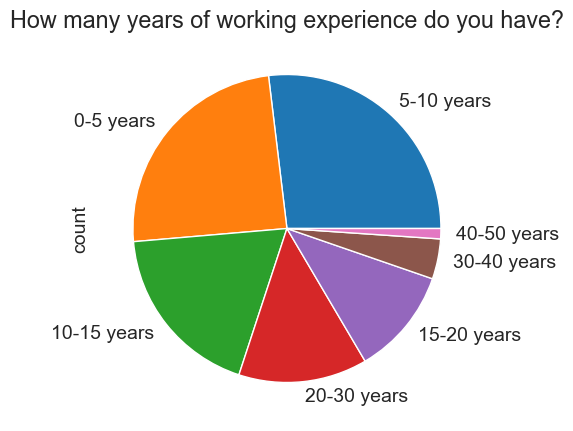

In [38]:
survey_df['WorkExp_cat'].value_counts().plot(kind='pie', title=survey_questions['WorkExp'])

In [39]:
survey_df['WorkExp_cat'].value_counts(ascending=True)

WorkExp_cat
40-50 years      470
30-40 years     1833
15-20 years     4885
20-30 years     5883
10-15 years     8086
0-5 years      10638
5-10 years     11707
Name: count, dtype: int64

---

## 2. Exploratory Data Analysis (EDA)

Perform descriptive statistics and visualize distributions of key variables.

#### Country

Let's look at the number of countries from which there are responses in the survey and plot the fifteen countries with the highest number of responses.

In [40]:
country_question = survey_questions['Country'].split('<span')[0].strip()

In [41]:
survey_df['Country'].nunique()

185

In [42]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Name: count, dtype: int64

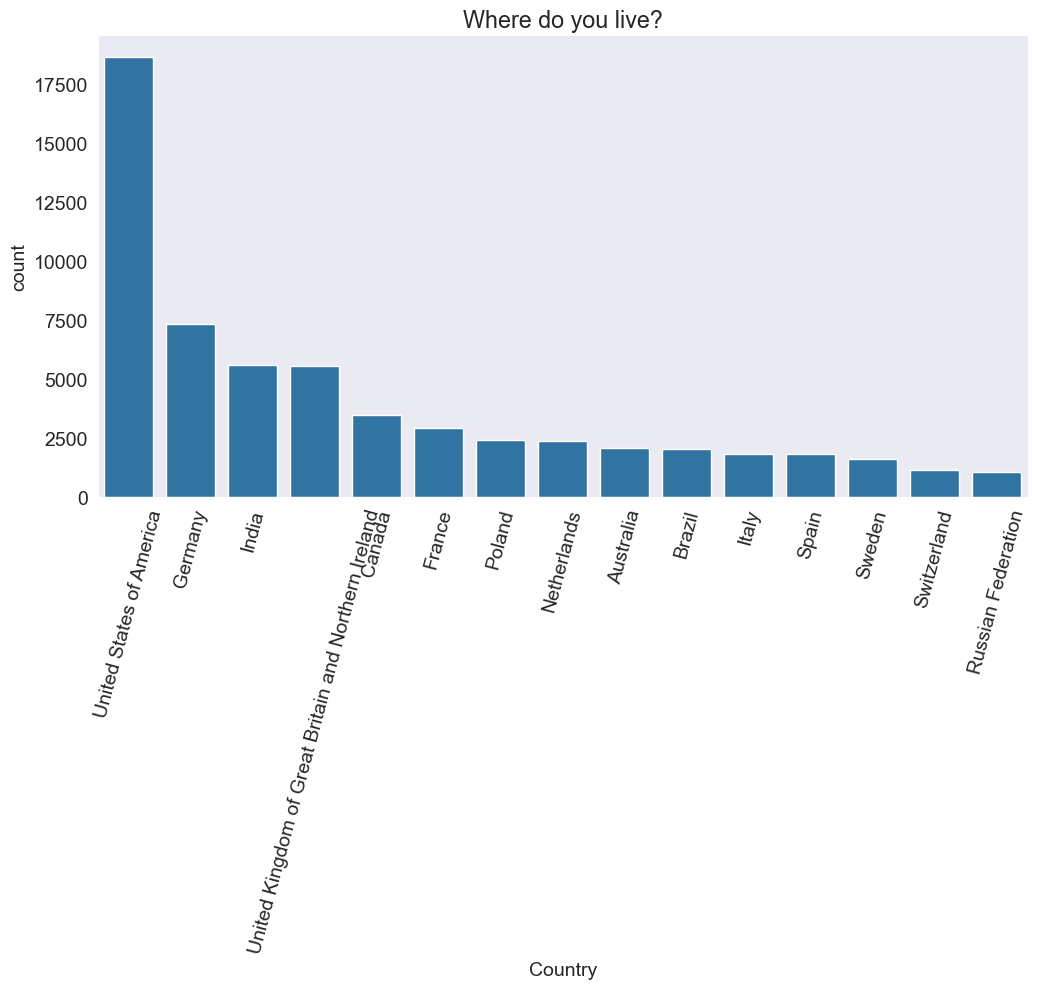

In [43]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(country_question)
sns.barplot(x=top_countries.index, y=top_countries);

<Axes: title={'center': 'What is your age? *'}, xlabel='Number of respondents', ylabel='Age'>

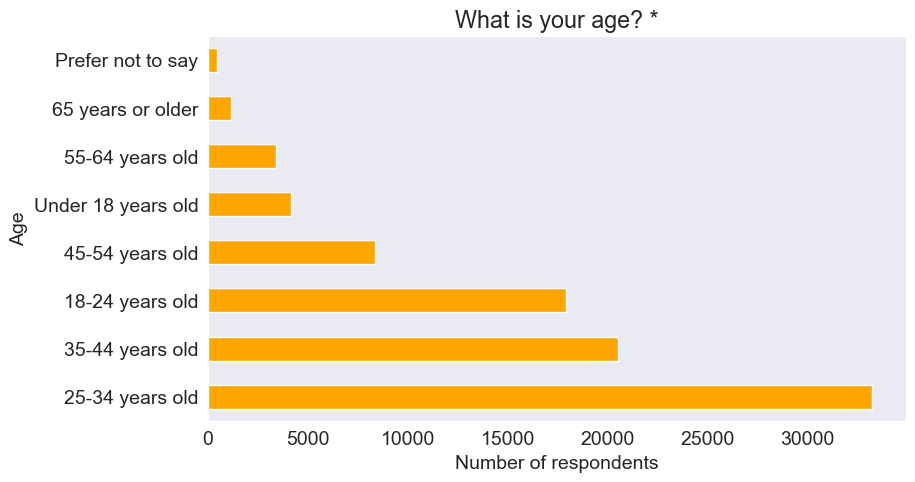

In [44]:
survey_df.Age.value_counts().plot(kind='barh', color='orange', title=survey_questions.Age, xlabel='Number of respondents')